In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import ELPH_utils
import ELPH_dyn
import ELPH_Scaler
import ELPH_Optimizer
import ELPH_Dim_Reducer
import ELPH_VAR_Transformer

from ELPH_RDNLVAR import RDNLVAR

(50, 4, 50)


<IPython.core.display.Javascript object>


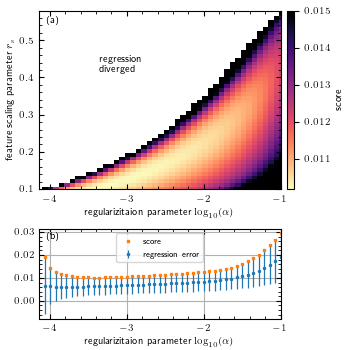

In [60]:
%matplotlib notebook


import os
path = '/home/agluedge/Preprints/ELPH/data/run1_poly_features_optimization/data/'

filenames = []
# r=root, d=directories, f = filenames
for r, d, f in os.walk(path):
    for file in f:
        if 'rs_' in file:
            filenames.append(os.path.join(r, file))

#for f in filenames:
    #print(f)

from natsort import realsorted
filenames = realsorted(filenames)


# ##print filenames
# for f in filenames:
#     print(f)
# nYdata = len(filenames)
# print(nYdata)
    
  
scans = [] # that data goes into this list
for fn in filenames:
  scans.append(np.loadtxt(fn)) #load linescan an append to the list of linescans - each linescan is matrix

scans = np.asarray(scans) #create numpy ndarray from list -- contains all the data -- format [number of files, sweep steps, data column]
print (scans.shape)


std = scans[:,0,:]
std_std = scans[:,1,:]

scores = std + std_std


VMAX = 0.015

###########
###########

ny,nx = scores.shape

xmin = -4.5
xmax = -1

ymin = 0.1
ymax = 0.6

y = np.linspace(ymin,ymax,ny)
x = np.linspace(xmin,xmax,nx)

dx = (xmax-xmin)/(nx-1)/2
dy = (ymax-ymin)/(ny-1)/2

extent = [xmin-dx,xmax+dx,ymin-dy,ymax+dy]


scrs = scores.copy()
for k in range(scrs.size):
    if np.isnan(scrs.flat[k]):
        scrs.flat[k] = 1


yminAr = np.amin(scrs, axis=1)
xminAr = np.amin(scrs, axis=0)

yminAr = np.ma.masked_greater(yminAr, VMAX*2)
xminAr = np.ma.masked_greater(xminAr, VMAX*2)

scores = np.ma.masked_greater(scores, VMAX*2)


xlim_min = -4.15  #xmin-dx
xlim_max = -1

ylim_min = 0.1
ylim_max = 0.58 #ymax + dy



####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,0.03], height_ratios=[2,1])



####################################################
####################################################
####################################################




ax00 = plt.subplot(gs[0,0])

im = plt.imshow(scores, origin='lower', interpolation='none', aspect='auto', vmax=VMAX, extent=extent, cmap='magma_r')
# plt.colorbar()

    
plt.xlabel(r'regularizitaion parameter $\log_{10}(\alpha)$')
plt.ylabel(r'feature scaling parameter $r_s$')

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)


ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


plt.text(0.03, 0.97,r'(a)', color='k', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

plt.text(0.25, 0.75,'regression\n diverged', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

axCB = plt.subplot(gs[0,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r"score")
####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])


plt.grid(0.5)

plt.errorbar(x, std[0], yerr=std_std[0], ls='none', lw=0.9, marker='o', ms=1.5,  label='regression error')

plt.plot(x, std[0]+std_std[0], ls='none', lw=0.7, marker='s',  ms = 1.5, label='score')

plt.legend(fontsize=fs-1, loc='upper center')

plt.xlim(xlim_min, xlim_max)

plt.xlabel(r'regularizitaion parameter $\log_{10}(\alpha)$')
# plt.ylabel(r'regularizitaion parameter $\log_{10}(\alpha)$')



    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################

plt.tight_layout()

plt.subplots_adjust(left=0.11, bottom=0.09, right=0.84, top=0.97, wspace=0.05, hspace=0.3)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/poly_opt.pdf', dpi=600)
plt.show()




In [ ]:
model = RDNLVAR(runs)

dim_reducer = ELPH_Dim_Reducer.SVD()
VAR_transformer = ELPH_VAR_Transformer.polynomial_features(order=2)

n_aExp = 40
n_rs = 40

aExpAr = np.linspace(-4.5,-1,n_aExp)
rsAr = np.linspace(0.1,0.6,n_rs)


max_scores = np.zeros((n_aExp,n_rs))
max_scores_std = np.zeros((n_aExp,n_rs))

std_scores = np.zeros((n_aExp,n_rs))
std_scores_std = np.zeros((n_aExp,n_rs))



for n,aExp in enumerate(aExpAr):
    
    for m,rs in enumerate(rsAr):
        
        scaler = ELPH_Scaler.normalize_scaler(rs)
        optimizer = ELPH_Optimizer.ridge(alpha=10**aExp)
        
        train_kwargs = {'rdim':20, 'prdim':20, 'n_VAR_steps':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler, 'dim_reducer':dim_reducer, 'VAR_transformer':VAR_transformer }
        
        mean_scores_std, mean_scores_max, all_scores_std, all_scores_max = ELPH_utils.get_KFold_CV_scores_std_max(model, runs, folds=10, seed=817, train_kwargs=train_kwargs)
        
        max_scores[n,m] = np.mean(mean_scores_max)
        max_scores_std[n,m] = np.std(all_scores_max)
    
        std_scores[n,m] = np.mean(mean_scores_std)
        std_scores_std[n,m] = np.std(all_scores_std)
        
        print('indices n,m:',n,',',m, 'aExp:', aExp, 'rs:', rs, 'score:', std_scores[n,m], '+-',  std_scores_std[n,m])
        

<IPython.core.display.Javascript object>


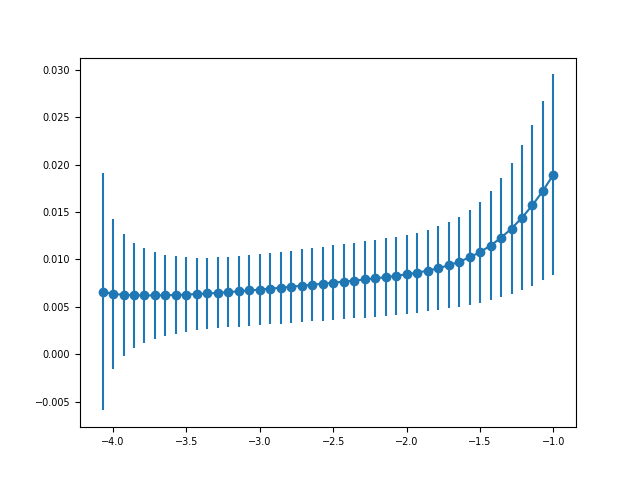

In [13]:

scores = np.loadtxt('/home/agluedge/Preprints/ELPH/data/run1_poly_features_optimization/data/rs_0.1')


plt.errorbar(np.linspace(-4.5,-1.0,scores[0].size),scores[0],yerr=scores[1],marker='o')
plt.show()



(50, 4, 50)


<IPython.core.display.Javascript object>


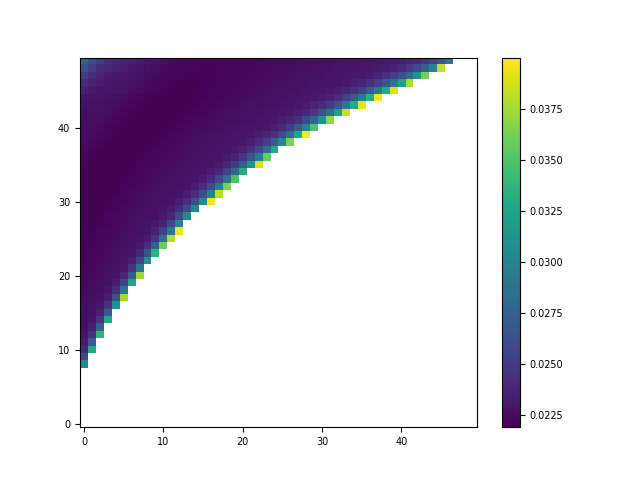

In [15]:
import os
path = '/home/agluedge/Preprints/ELPH/data/run1_poly_features_optimization/data/'

filenames = []
# r=root, d=directories, f = filenames
for r, d, f in os.walk(path):
    for file in f:
        if 'rs_' in file:
            filenames.append(os.path.join(r, file))

#for f in filenames:
    #print(f)

from natsort import realsorted
filenames = realsorted(filenames)


# ##print filenames
# for f in filenames:
#     print(f)
# nYdata = len(filenames)
# print(nYdata)
    
  
scans = [] # that data goes into this list
for fn in filenames:
  scans.append(np.loadtxt(fn)) #load linescan an append to the list of linescans - each linescan is matrix

scans = np.asarray(scans) #create numpy ndarray from list -- contains all the data -- format [number of files, sweep steps, data column]
print (scans.shape)


std = scans[:,3,:].T

std = np.ma.masked_greater(std, 0.04)

plt.imshow(std, aspect='auto', interpolation='none', origin='lower')
plt.colorbar()
plt.show()



In [ ]:
%matplotlib notebook


scores = np.loadtxt('/home/agluedge/Preprints/ELPH/figs/poly_features_opt/scores')

ny,nx = scores.shape

xmin = 0.1
xmax = 1.0

ymin = -5
ymax = -1

y = np.linspace(ymin,ymax,ny)
x = np.linspace(xmin,xmax,nx)

dx = (xmax-xmin)/(nx-1)/2
dy = (ymax-ymin)/(ny-1)/2

extent = [xmin-dx,xmax+dx,ymin-dy,ymax+dy]


scrs = scores.copy()
for k in range(scrs.size):
    if np.isnan(scrs.flat[k]):
        scrs.flat[k] = 1


yminAr = np.amin(scrs, axis=1)
xminAr = np.amin(scrs, axis=0)

yminAr = np.ma.masked_greater(yminAr, 0.15)
xminAr = np.ma.masked_greater(xminAr, 0.15)

scores = np.ma.masked_greater(scores, 0.15)


xlim_min = xmin-dx
xlim_max = 0.6

ylim_min = -4.5
ylim_max = ymax + dy



min_inds = np.zeros((2,nx))

for n in range(nx):
    min_inds[:,n] = np.array([n,np.argmin(scrs[:,n])])

print(min_inds)

minpos_x = xmin + min_inds[0]*dx*2
minpos_y = ymin + min_inds[1]*dy*2

minpos_y = np.ma.masked_where(min_inds[1] < 0.5, minpos_y)



min_inds_y = np.zeros((2,ny))

for n in range(ny):
    min_inds_y[:,n] = np.array([n,np.argmin(scrs[n])])

print(min_inds_y)

minpos_x_y = xmin + min_inds_y[1]*dx*2
minpos_y_y = ymin + min_inds_y[0]*dy*2

minpos_x_y = np.ma.masked_where(np.amin(scrs, axis=1) > 0.5, minpos_x_y)




####################################################
####################################################
####################################################

# from matplotlib import rc
# rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=3, ncols=2, width_ratios=[3,1], height_ratios=[0.1,3,1])



####################################################
####################################################
####################################################




ax00 = plt.subplot(gs[1,0])

im = plt.imshow(scores, origin='lower', interpolation='none', aspect='auto', vmax=0.015, extent=extent, cmap='magma_r')
# plt.colorbar()

plt.plot(minpos_x, minpos_y, '--', marker='o', lw = 0.7, ms = 2, alpha=0.5)

plt.plot(minpos_x_y, minpos_y_y, '--', c='C2', marker='o', lw = 0.7, ms = 2, alpha=0.5)

    
plt.ylabel(r'regularizitaion parameter $\log_{10}(\alpha)$')

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)


ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


plt.text(0.03, 0.97,r'(a)', color='w', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


axCB = plt.subplot(gs[0,0])

cb = plt.colorbar(im, cax = axCB, orientation='horizontal')
cb.set_label(r"score")
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position('top')

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,1])


plt.grid(0.5)

plt.plot(yminAr, y, '--', c='C2', marker='o', lw = 1.0, ms = 5)


plt.xlabel('minimum\nscore')
# plt.ylabel(r'regularizitaion parameter $\log_{10}(\alpha)$')

plt.xlim(0.0063,0.0083)
plt.ylim(ylim_min, ylim_max)
    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.001))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.0002))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax00.yaxis.set_major_formatter(ticker.NullFormatter())
ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[2,0])


plt.grid()
plt.plot(x, xminAr, '--', marker='o', lw = 1.0, ms = 5)

plt.xlabel(r'feature scaling range $r_s$')
plt.ylabel('minimum score')

plt.xlim(xlim_min, xlim_max)

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.001))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.0002))
# #ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# #ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(c)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################

plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.08, right=0.97, top=0.91, wspace=0.1, hspace=0.1)

# plt.savefig('/home/agluedge/Preprints/ELPH/figs/poly_opt.pdf', dpi=600)
plt.show()


